In [252]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [253]:
xaim = 2000

rflare = 17000

hcloop = 1670

hdecay = 2

sigma_exp = 500

gsstp = np.deg2rad(24)
gssh = np.deg2rad(2.8)

tgstp = np.tan(gsstp)
tgsh = np.tan(gssh)


def ogs(x):
    
    hk = hcloop + rflare*np.cos(gsstp)
    
    he = hk - rflare*np.cos(gssh) - hdecay
    
    xexp = -he/tgsh + xaim
    
    xk = xexp + rflare*np.sin(gssh)
    
    xa = xk - rflare*np.sin(gsstp) + hcloop/tgstp

    return max(0.0, (xa - x) * tgstp)

def flare(x):
    
    
    
    hk = hcloop + rflare*np.cos(gsstp)
    
    he = hk - rflare*np.cos(gssh) - hdecay
    
    xexp = -he/tgsh + xaim
    
    xk = xexp + rflare*np.sin(gssh)
    
    xa = xk - rflare*np.sin(gsstp) + hcloop/tgstp
    
    xflarecir = xk - x
    yflarecir = np.sqrt(rflare**2 - xflarecir**2)

    return hk - yflarecir

def flareexp(x):
    
    hk = hcloop + rflare*np.cos(gsstp)
    
    he = hk - rflare*np.cos(gssh) - hdecay
    
    xexp = -he/tgsh + xaim
    
    xk = xexp + rflare*np.sin(gssh)

    herrexp = hdecay * math.exp((xexp - x)/sigma_exp)
    
    href = igs(x)
    href += min(href, herrexp)
    return max(0.0, href)

def igs(x):

    return max(0.0, (xaim - x) * tgsh)

def igs2(x):
    

    return max(0.0, (xaim - x) * tgsh + hdecay)
    
def flarehdot(x):
    
    hk = hcloop + rflare*np.cos(gsstp)
    
    he = hk - rflare*np.cos(gssh) - hdecay
    
    xexp = -he/tgsh + xaim
    
    xk = xexp + rflare*np.sin(gssh)
    
    xflarecir = xk - x
    yflarecir = np.sqrt(rflare**2 - xflarecir**2)
    
    return -np.rad2deg(np.arctan(xflarecir/yflarecir))

def exphdot(x):
    
    hk = hcloop + rflare*np.cos(gsstp)
    
    he = hk - rflare*np.cos(gssh) - hdecay
    
    xexp = -he/tgsh + xaim
    
    herrexp = hdecay * math.exp((xexp - x)/sigma_exp)
    
    return -np.rad2deg(np.arctan( tgsh + herrexp/sigma_exp ))
    

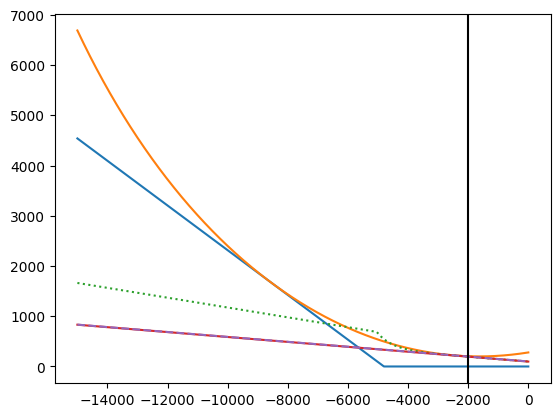

In [254]:
x = np.linspace(-15000, 0, 1000)

plt.figure()

plt.plot(x, [ogs(x_) for x_ in x])
plt.plot(x, [flare(x_) for x_ in x])
plt.plot(x, [flareexp(x_) for x_ in x], ':')
plt.plot(x, [igs(x_) for x_ in x])
plt.plot(x, [igs2(x_) for x_ in x], '--')
plt.axvline(x = -xaim, color = 'k')



(200.0, 400.0)

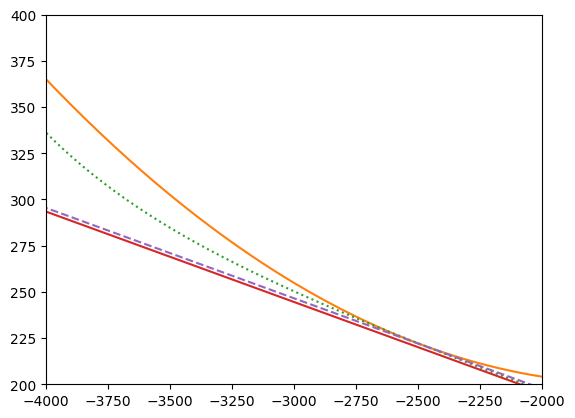

In [255]:
plt.figure()

plt.plot(x, [ogs(x_) for x_ in x])
plt.plot(x, [flare(x_) for x_ in x])
plt.plot(x, [flareexp(x_) for x_ in x], ':')
plt.plot(x, [igs(x_) for x_ in x])
plt.plot(x, [igs2(x_) for x_ in x], '--')

plt.xlim([-4000, -2000])
plt.ylim([200, 400])

-10951.095177025803 -4959.660457803143
-11.265857227153976 -32.27754404967104


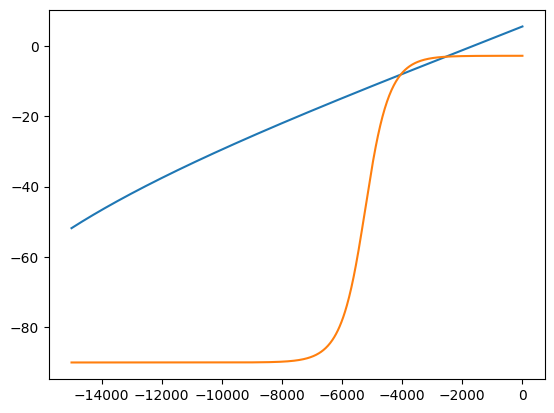

In [256]:
print(-10951.095177025803, -4959.660457803143)

print(flarehdot(-4959.660457803143), exphdot(-4959.660457803143))


plt.figure()

plt.plot(x, [flarehdot(x_) for x_ in x])
plt.plot(x, [exphdot(x_) for x_ in x])

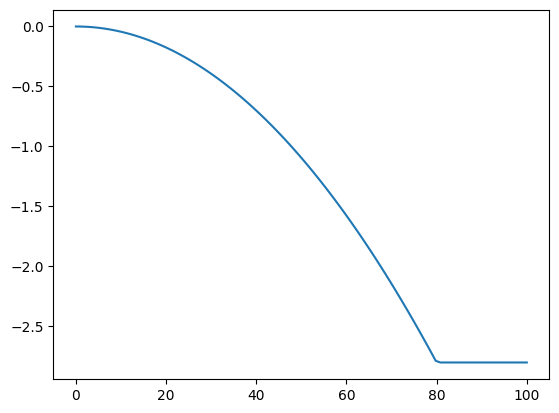

In [265]:
def fnlflhdot(h):
    
    sigma_h_exp = 1 / tgsh
    h0 = 80
    
    flare_hdot = (h/h0)**2 * tgsh
    
    hdot_prof = min(tgsh, flare_hdot)
    
    return -np.rad2deg(np.arctan(hdot_prof))
    

h = np.linspace(0, 100, 100)
plt.plot(h, [fnlflhdot(h_) for h_ in h])

